In [1]:
#|default_exp dino

In [3]:
#|export

from fastai.vision.widgets import *
import gradio as gr


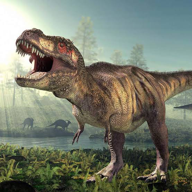

In [4]:
im = PILImage.create('images.jpeg')
im.thumbnail((192,192))
im

In [5]:
#|export
learn = load_learner('export.pkl')


In [6]:
%time learn.predict(im)

CPU times: user 631 ms, sys: 88 ms, total: 720 ms
Wall time: 214 ms


('trex',
 tensor(3),
 tensor([2.8448e-05, 7.2189e-06, 2.6055e-06, 9.9986e-01, 9.7011e-05]))

In [7]:
#|export
categories = ('ankylosaurus', 'brontosaurus', 'pterodactyl', 'trex', 'triceraptops')

def classify(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [8]:
classify(im)

{'ankylosaurus': 2.8447859222069383e-05,
 'brontosaurus': 7.218893188110087e-06,
 'pterodactyl': 2.6055167836602777e-06,
 'trex': 0.9998646974563599,
 'triceraptops': 9.701061935629696e-05}

In [9]:
#|export

image = gr.Image(width=512, height=512)
label = gr.Label(num_top_classes=3)
examples = ['ankylosaurus.jpg', 'images.jpeg']

demo = gr.Interface(fn=classify, inputs=image, outputs=label, examples=examples)
demo.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [12]:
import nbdev

In [16]:
nbdev.export.nb_export('app.ipynb')
